In [65]:
import pandas as pd
import nltk

In [66]:
csv_file = r'C:\Users\groov\PythonCode\output\trump_tweets\trump_tweets.csv'

df = pd.read_csv(csv_file, names=['date_posted', 'tweet'])
df.tail()

,date_posted,tweet
71,2019-10-13 22:16:39+00:00,".....BY THE WAY, DON’T CALL ME AGAIN, I’LL CAL..."
72,2019-10-13 23:09:01+00:00,.@marklevinshow on @FoxNews is doing a big sho...
73,2019-10-13 23:27:49+00:00,The U.S. has the worst of the ISIS prisoners. ...
74,2019-10-14 00:10:14+00:00,Somebody please explain to Chris Wallace of Fo...
75,2019-10-14 00:34:01+00:00,“Serial killers get more Due Process than the ...


In [67]:
df.shape

(76, 2)

In [68]:
from nltk.tokenize import TreebankWordTokenizer

tokenizer = TreebankWordTokenizer()
df['tokens'] = df['tweet'].apply(tokenizer.tokenize)

df['tokens'][0:5]

0    [“, There, are, no, felonies, ,, there, are, n...
1    [So, many, people, conveniently, forget, that,...
2    [..., ..good, health, ,, at, my, request, ,, P...
3    [We, may, be, in, the, process, of, leaving, S...
4    [..., .understands, that, while, we, only, had...
Name: tokens, dtype: object

In [69]:
from nltk.util import ngrams

list(ngrams(df['tokens'][0], 3))[0:5]

[('“', 'There', 'are'),
 ('There', 'are', 'no'),
 ('are', 'no', 'felonies'),
 ('no', 'felonies', ','),
 ('felonies', ',', 'there')]

In [70]:
nltk.download('stopwords')
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS as stop_words_sklearn

stop_words_nltk = nltk.corpus.stopwords.words('english')
print(stop_words_nltk[0:5])
print(list(stop_words_sklearn)[0:5])

['i', 'me', 'my', 'myself', 'we']
['how', 'enough', 'always', 'otherwise', 'towards']


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\groov\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [71]:
stop_words = []

stop_words = stop_words + stop_words_nltk
stop_words = stop_words + list(stop_words_sklearn)
stop_words = list(set(stop_words))

stop_words_mine = ['“', '”', ',', '@', '’', '!', '&amp;']
stop_words = stop_words + stop_words_mine

len(stop_words), len(stop_words_nltk), len(list(stop_words_sklearn))

(385, 179, 318)

In [72]:
tokens = [token for token in df['tokens'][0] if token not in stop_words]
" ".join(tokens)

'There felonies Impeachable offenses. The Constitution clear need bribery treason high crimes misdemeanors. You impeached conduct alleged case. AlanDersh Dershowitz. seanhannity A Scam'

In [73]:
# stemming removes the small meaning differences of pluralization or posssessive endings of words to normalize vocabulary
# it can reduce the precision score of your search results, but would improve the recall score for returning relevant docs
# so it is often useful to be able to turn off stemming where you want precision

# two of the most popular stemmers are Porter and Snowball. They were both created by the scientist Martin Porter.

In [74]:
from nltk.stem.porter import PorterStemmer

stemmer = PorterStemmer()

stemmed_tokens = [stemmer.stem(word) for word in tokens]

" ".join(stemmed_tokens)

'there feloni impeach offenses. the constitut clear need briberi treason high crime misdemeanors. you impeach conduct alleg case. alandersh dershowitz. seanhann A scam'

In [75]:
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer(language='english')

stemmed_tokens = [stemmer.stem(word) for word in tokens]

" ".join(stemmed_tokens)

'there feloni impeach offenses. the constitut clear need briberi treason high crime misdemeanors. you impeach conduct alleg case. alandersh dershowitz. seanhann a scam'

In [76]:
# lemmatization can associate words together by their meaning even if their spelling is different
# like stemming, this can make your model less precise but more general
# it is potentially more accurate than stemming because it takes into account word meaning
# some lemmatizers use the word's part of speech in addition to spelling to improve accuracy
# so, lemmatizers are better than stemmers for most applications.

# and if you really want the dimension reduction and recall improvement of a stemmer in your information 
# retrieval pipeline, you shoudl probably also use a lemmatizer right befor the stemmer.
# because the lemma of a word is a valid English word, stemmers work well on the output of a lemmatizer

In [77]:
nltk.download('wordnet')

from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]

" ".join(lemmatized_tokens)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\groov\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


'There felony Impeachable offenses. The Constitution clear need bribery treason high crime misdemeanors. You impeached conduct alleged case. AlanDersh Dershowitz. seanhannity A Scam'

In [78]:
" ".join(tokens) # slight difference

'There felonies Impeachable offenses. The Constitution clear need bribery treason high crimes misdemeanors. You impeached conduct alleged case. AlanDersh Dershowitz. seanhannity A Scam'

In [79]:
# when should you use a lemmatizer or a stemmer?
# stemmers are generally faster to compute and require less-complex code and datasets. but stemmers make more errors
# and stem a far greater number of words, reducing the meaning of your text much more than a lemmatizer will.

# both stemmers will reduce the vocabulary of your text and increase the ambiguity of the text. but lemmatizers do
# a better job at retaining information content of a word. so some packages such as spaCy do not provide stemming functions.

In [80]:
# VADER was one of the first rule-based sentiment analysis algorithms. 
# it stands for Valence Aware Dictionary for sEntiment Reasoning.
# nltk has an implementation of the VADER algorithm

In [81]:
nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer

sa = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\groov\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [82]:
#[token for token in df['tokens'][0] if token not in stop_words]

for i in range(len(df['tokens'])):
    df['tokens'][i] = [token for token in df['tokens'][i] if token not in stop_words]


In [83]:
sa_tweets = []

# put it back into sentence form so sa can handle it.
for i in range(len(df['tokens'])):
    sa_tweets.append(" ".join(df['tokens'][i]))

In [84]:
neg = []
neu = []
pos = []
compound = []

for tweet in sa_tweets:
    print(tweet)
    print(sa.polarity_scores(tweet))
    print()
    
    neg.append(sa.polarity_scores(tweet)['neg'])
    neu.append(sa.polarity_scores(tweet)['neu'])
    pos.append(sa.polarity_scores(tweet)['pos'])
    compound.append(sa.polarity_scores(tweet)['compound'])

There felonies Impeachable offenses. The Constitution clear need bribery treason high crimes misdemeanors. You impeached conduct alleged case. AlanDersh Dershowitz. seanhannity A Scam
{'neg': 0.391, 'neu': 0.528, 'pos': 0.081, 'compound': -0.875}

So people conveniently forget Turkey big trading partner United States fact make structural steel frame F-35 Fighter Jet. They good deal helping save lives Idlib Province returning ... ..
{'neg': 0.057, 'neu': 0.607, 'pos': 0.335, 'compound': 0.8603}

... ..good health request Pastor Brunson years long prison term remaining. Also remember importantly Turkey important member good standing NATO. He coming U.S. guest November 13th. # ENDENDLESSWARS
{'neg': 0.099, 'neu': 0.691, 'pos': 0.21, 'compound': 0.4019}

We process leaving Syria way Abandoned Kurds special people wonderful fighters. Likewise relationship Turkey NATO Trading partner good. Turkey large Kurdish population fully ... .
{'neg': 0.129, 'neu': 0.585, 'pos': 0.286, 'compound': 0.72

In [85]:
sa_df = pd.DataFrame({'neg': neg, 'neu': neu, 'pos': pos, 'compound': compound, 'tweet': df['tweet']})
sa_df.head()

,neg,neu,pos,compound,tweet
0,0.391,0.528,0.081,-0.8750,"“There are no felonies, there are no Impeachab..."
1,0.057,0.607,0.335,0.8603,So many people conveniently forget that Turkey...
2,0.099,0.691,0.210,0.4019,".....good health, at my request, Pastor Brunso..."
3,0.129,0.585,0.286,0.7269,"We may be in the process of leaving Syria, but..."
4,0.262,0.654,0.085,-0.6808,....understands that while we only had 50 sold...


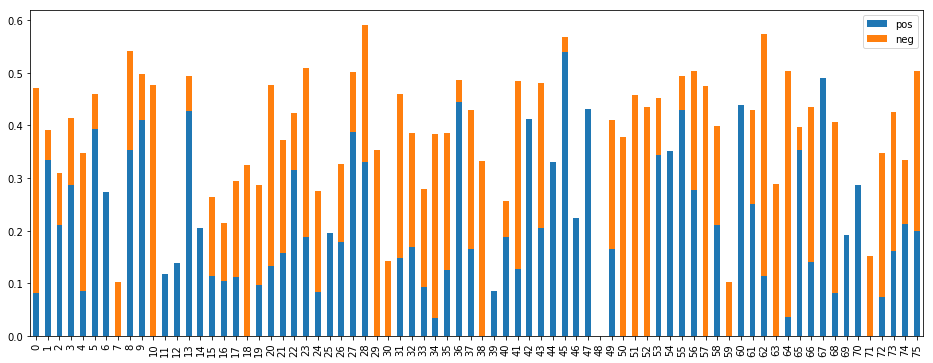

In [86]:
import matplotlib.pyplot
%matplotlib inline

sa_df[['pos', 'neg']].plot.bar(stacked=True, figsize=(16,6))

In [87]:
sa_df.describe()

,neg,neu,pos,compound
count,76.000000,76.000000,76.000000,76.000000
mean,0.179105,0.633355,0.187539,0.020161
std,0.145249,0.129838,0.146129,0.694819
min,0.000000,0.410000,0.000000,-0.953100
25%,0.053750,0.527500,0.082750,-0.630900
50%,0.165000,0.604000,0.165500,-0.038700
75%,0.289750,0.713250,0.294000,0.758950
max,0.476000,1.000000,0.540000,0.981900


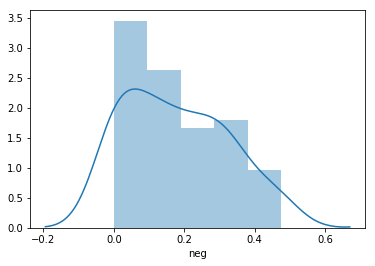

In [88]:
import seaborn as sns

sns.distplot(sa_df['neg'])

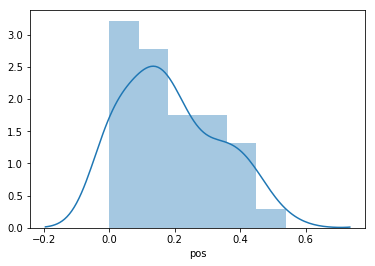

In [89]:
sns.distplot(sa_df['pos'])

In [90]:
for tweet in sa_df[sa_df['pos'] > 0.4]['tweet']:
    print(tweet)
    print(sa.polarity_scores(tweet))
    print()

Someone please tell the Radical Left Mayor of Minneapolis that he can’t price out Free Speech. Probably illegal! I stand strongly &amp; proudly with the great Police Officers and Law Enforcement of Minneapolis and the Great State of Minnesota! See you Thursday Night!
{'neg': 0.061, 'neu': 0.593, 'pos': 0.345, 'compound': 0.9499}

....If there is a Runoff in Louisiana, you will have a great new Republican Governor who will Cut your Taxes and Car Insurance, and do a fabulous job for you and your family. Vote Republican, the Party of Honest Abe Lincoln!
{'neg': 0.043, 'neu': 0.675, 'pos': 0.282, 'compound': 0.9134}

Thank you to @OANN One America News for your fair coverage and brilliant reporting. It is appreciated by many people trying so hard to find a new, consistent and powerful VOICE! See you tonight at the Big Rally in Minneapolis.
{'neg': 0.037, 'neu': 0.662, 'pos': 0.301, 'compound': 0.9205}

Good things are happening at China Trade Talk Meeting. Warmer feelings than in recent pa

In [91]:
for tweet in sa_df[sa_df['neg'] > 0.4]['tweet']:
    print(tweet)
    print(sa.polarity_scores(tweet))
    print()
    
# the war one is interesting, because that's actually a very positive message

Hasn’t Adam Schiff been fully discredited by now? Do we have to continue listening to his lies?
{'neg': 0.298, 'neu': 0.702, 'pos': 0.0, 'compound': -0.7471}

“Schiff aides worked with Whistleblower.” @foxandfriends  @RepLeeZeldin  Schiff is a lying mess!
{'neg': 0.408, 'neu': 0.592, 'pos': 0.0, 'compound': -0.7345}

The case of Major Mathew Golsteyn is now under review at the White House. Mathew is a highly decorated Green Beret who is being tried for killing a Taliban bombmaker. We train our boys to be killing machines, then prosecute them when they kill! @PeteHegseth
{'neg': 0.297, 'neu': 0.703, 'pos': 0.0, 'compound': -0.9551}

The Endless Wars Must End!
{'neg': 0.493, 'neu': 0.507, 'pos': 0.0, 'compound': -0.5983}

Very smart not to be involved in the intense fighting along the Turkish Border, for a change. Those that mistakenly got us into the Middle East Wars are still pushing to fight. They have no idea what a bad decision they have made. Why are they not asking for a Declarati

In [92]:
for tweet in sa_df[sa_df['neu'] > 0.8]['tweet']:
    print(tweet)
    print(sa.polarity_scores(tweet))
    print()

I think that Crooked Hillary Clinton should enter the race to try and steal it away from Uber Left Elizabeth Warren. Only one condition. The Crooked one must explain all of her high crimes and misdemeanors including how &amp; why she deleted 33,000 Emails AFTER getting “C” Subpoena!
{'neg': 0.071, 'neu': 0.929, 'pos': 0.0, 'compound': -0.5411}

Radical Left Dem Mayor of Minneapolis, Jacob Frey, is doing everything possible to stifle Free Speech despite a record sell-out crowd at the Target Center. Presidents Clinton and Obama paid almost nothing! The Minneapolis Police have been incredible....
{'neg': 0.0, 'neu': 0.909, 'pos': 0.091, 'compound': 0.5562}

....In fact, the “Cops For Trump” T-shirt Web Site CRASHED because of incredible volume, but is now back up and running. Proceeds go to the Police Union Charities. See you on Thursday night in Minneapolis!
{'neg': 0.0, 'neu': 0.881, 'pos': 0.119, 'compound': 0.68}

President Obama said that he did not have the right to sign DACA, that 